# Lecture 9

In [ ]:
%run set_env.py
%matplotlib inline

## CuPy: A Numpy/Scipy analogue for GPUs

* <a href="https://cupy.dev/">GPU-accelerated computing with Python</a>
* uses cuBLAS, cuRAND, cuFFT, cuDNN, NCCL under the hood.
* available at CHPC:
  + module load python/3.10.3 cupy/12.3.0-cuda12.2.0
  + module load python/3.11.3 cupy/12.3.0-cuda12.2.0  

## Numpy as building stone for a few other packages

### Scipy

Scipy contains specialized modules related to science & engineering.<br>
Among them we have the following modules:
* Special functions (<font color="green"><b>scipy.special</b></font>)
* Integration (<font color="green"><b>scipy.integrate</b></font>)
* Optimization (<font color="green"><b>scipy.optimize</b></font>)
* Interpolation (<font color="green"><b>scipy.interpolate</b></font>)
* Fourier Transforms (<font color="green"><b>scipy.fftpack</b></font>) 
* Signal Processing (<font color="green"><b>scipy.signal</b></font>)
* Linear Algebra (<font color="green"><b>scipy.linalg</b></font>)
* Compressed Sparse Graph Routines (<font color="green"><b>scipy.sparse.csgraph</b></font>)  
* Spatial Data Structures & algorithms (<font color="green"><b>scipy.spatial</b></font>) 
* Statistics (<font color="green"><b>scipy.stats</b></font>) 
* Multidimensional Image Processing (<font color="green"><b>scipy.ndimage</b></font>)
* File IO (<font color="green"><b>scipy.io</b></font>)

#### Special functions (scipy.special)

* contains numerous special functions of mathematical physics such as:
  * airy
  * elliptic
  * bessel
  * gamma
  * beta
  * hypergeometric
  * parabolic cylinder
  * mathieu
  * struve
  * kelvin
  * $\ldots$
* low-level stats functions are to be found in the stats module  
* help(special)
 

##### Example

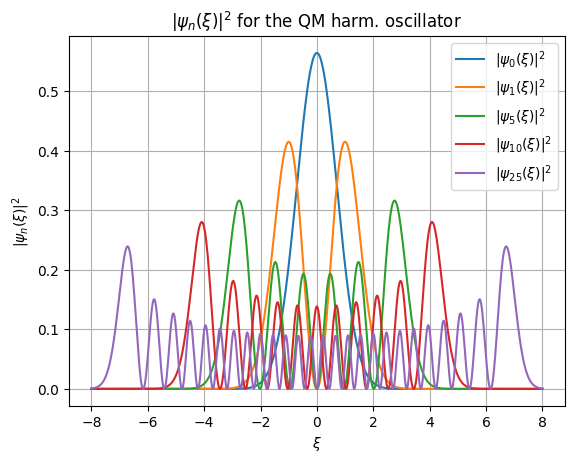

In [1]:
# Example Special functions
import numpy as np
import matplotlib.pyplot as plt
from math import exp, factorial, pow, pi, sqrt
from scipy.special import hermite

preA=np.array([sqrt(1.0/( pow(2.0,i)*factorial(i)*\
sqrt(pi))) for i in range(26)])
xi=np.linspace(-8.0,8.0,641)
prob0=(preA[0]*np.exp(-xi*xi/2.)* hermite(0)(xi))**2
prob1=(preA[1]*np.exp(-xi*xi/2.)* hermite(1)(xi))**2
prob5=(preA[5]*np.exp(-xi*xi/2.)* hermite(5)(xi))**2
prob10=(preA[10]*np.exp(-xi*xi/2.)* hermite(10)(xi))**2
prob25=(preA[25]*np.exp(-xi*xi/2.)* hermite(25)(xi))**2
plt.plot(xi,prob0,label=r'$|\psi_0(\xi)|^2$')
plt.plot(xi,prob1,label=r'$|\psi_1(\xi)|^2$')
plt.plot(xi,prob5,label=r'$|\psi_5(\xi)|^2$')
plt.plot(xi,prob10,label=r'$|\psi_{10}(\xi)|^2$')
plt.plot(xi,prob25,label=r'$|\psi_{25}(\xi)|^2$')
plt.title(r'$|\psi_n(\xi)|^2$ for the QM harm. oscillator')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$|\psi_n(\xi)|^2$')
plt.legend()
plt.grid(True);

#### Integration (scipy.integrate)

* provides several integration techniques such as
  * quad: general purpose integration
  * dblquad: general purpose double integration 
  * ...
* help(integrate)  

##### Example

Integrals to be calculated:<br>

$ \begin{eqnarray}
      \int_{0}^{1}\, x^3\,dx &= &\frac{1}{4} \nonumber \\
      \frac{1}{\sqrt{2\,\pi}} \,\int_{-\infty}^{\infty}\, e^{-x^2/2} \,dx & = & 1  \nonumber \\
      \int_{-\infty}^{\infty}\,\frac{\cos(x)}{x^2\,+\,a^2}\,dx & = & \pi\,\frac{e^{-a}}{a} \nonumber \\
      & & \mathrm{if}\, a=2.1=> 0.183194388278 \nonumber
\end{eqnarray}$      

In [2]:
# Example: 
import scipy
from scipy.integrate import quad,dblquad
from math import pi,sqrt,exp,cos

a=2.1; VAL=1000000
integ1 = quad(lambda x: x**3, 0.0, 1.0)
integ2 = quad(lambda x:1/(sqrt(2.0*pi))*exp(-x*x/2.),-np.inf,np.inf)
integ3 = quad(lambda x:cos(x)/(x**2+a**2),-np.inf,+np.inf,limit=VAL)
val3 = pi *exp(-a)/a

print(f"  integ1:{integ1} and should be 0.25")
print(f"  integ2:{integ2} and should be 1.00")
print(f"  integ3:{integ3} and should be {val3}")

  integ1:(0.25, 2.7755575615628914e-15) and should be 0.25
  integ2:(0.9999999999999997, 1.017819145094224e-08) and should be 1.00
  integ3:(0.18319418942137106, 1.0091729618355583e-06) and should be 0.18319438827829215


/tmp/ipykernel_28320/3380260638.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integ3 = quad(lambda x:cos(x)/(x**2+a**2),-np.inf,+np.inf,limit=VAL)


#### Optimization (scipy.optimize)

* This package contains several optimization algorithms
* Help: help(scipy.optimize)
* Module contains:
  * Constrained & unconstrained minimization 
  * Least-square minimization
  * $\ldots$

#### Interpolation(scipy.interpolate)

* This package contains several general interpolation techniques, such as:
  * $1D$ interpolation
  * Multivariate data interpolation
  * Spline interpolation
  * Radial basis functions for smoothing/interpolation
  * $\ldots$

### Other packages

* <a href="https://matplotlib.org/">matplotlib</a>: $2D$ plotting library 
* <a href="https://pandas.pydata.org/">pandas</a>: Data Analysis
* <a href="http://www.astropy.org/">astropy</a>: Astronomy
* <a href="http://scikit-learn.org/">scikit-learn</a>: ML
* ...